# HW 2



---

#### Name: 吳原博
#### Student ID: 0816004

---

## 助教好 😀
+ 程式碼的解釋會放在每個程式碼區塊上方的 markdown 裡，謝謝!
+ Question 會在對應模型的下方

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

# Data Input && Preprocessing
如下面註解，我把 categorical 的欄位做 one hot 編碼，再將 label 分為 binary 和 5 level，最後再用 k-fold 切資料並且以 pca 降維

In [134]:
data = pd.read_csv('student-mat.csv',sep=';')
# 分出 numerical 和 categorical 的欄位
i = 0
num_i = [] # 數值型特徵的欄位
cat_i = [] # 非數值型特徵的欄位
for d in data.loc[1]:
    if(type(d).__name__=='int64'):
        num_i.append(data.columns[i])
    else:
        cat_i.append(data.columns[i])
    i += 1
# 將 categorical 欄位下數字標籤後，使用 one hot 編碼，資料將被完全轉為數字
data_tmp = data
data = data[num_i]
enc = preprocessing.OneHotEncoder()
le = preprocessing.LabelEncoder()
for c in cat_i:
    data_tmp[c] = le.fit_transform(data_tmp[c])
    tempdata = enc.fit_transform(data_tmp[[c]]).toarray()
    for i in range(tempdata.shape[1]):
        col = c + str(i)
        data[col] = tempdata[:,i]
# 將 G3 分出來並且分好 binary 和 5 level 標準
X = data.drop('G3',axis=1)
Y = data['G3']
Y_bin = Y.copy()
Y_lv = Y.copy()
for i, y in enumerate(Y):
    if(Y[i] >= 10):
        Y_bin[i] = 1 # pass
    else:
        Y_bin[i] = 0 # fail
    if(Y[i] >= 16):
        Y_lv[i] = 5
    elif(Y[i] >= 14):
        Y_lv[i] = 4
    elif(Y[i] >= 12):
        Y_lv[i] = 3
    elif(Y[i] >= 10):
        Y_lv[i] = 2
    else:
        Y_lv[i] = 1
# k-fold 將資料切成三分，順便做 PCA 降維
kf = KFold(n_splits=3,shuffle=True)
pca = PCA(n_components=2)
X = np.array(X)
Y_bin = np.array(Y_bin)
Y_lv = np.array(Y_lv)
X_train = []
X_test = []
Y_bin_train = []
Y_bin_test = []
Y_lv_train = []
Y_lv_test = []
pca_X_train = []
pca_X_test = []
for train, test in kf.split(X):
    pca_X_train.append(pca.fit_transform(X[train]))
    pca_X_test.append(pca.transform(X[test]))
    X_train.append(X[train])
    X_test.append(X[test])
    Y_bin_train.append(Y_bin[train])
    Y_bin_test.append(Y_bin[test])
    Y_lv_train.append(Y_lv[train])
    Y_lv_test.append(Y_lv[test])

C:\Users\user\AppData\Local\Temp/ipykernel_3788/4024529055.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = tempdata[:,i]
C:\Users\user\AppData\Local\Temp/ipykernel_3788/4024529055.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = tempdata[:,i]
C:\Users\user\AppData\Local\Temp/ipykernel_3788/4024529055.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

# Decision Tree
這次作業我都使用 sklearn 的 modle，以下總共有四棵樹，分別為 binary 和 5 level 有無 pca 的模型

In [54]:
id3_bin = tree.DecisionTreeClassifier()
id3_bin_pca = tree.DecisionTreeClassifier()
id3_lv = tree.DecisionTreeClassifier()
id3_lv_pca = tree.DecisionTreeClassifier()

matrix_bin = [[0,0],[0,0]]
matrix_bin_pca = [[0,0],[0,0]]
matrix_lv = [[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
matrix_lv_pca = [[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
acc_bin = 0
acc_bin_pca = 0
acc_lv = 0
acc_lv_pca = 0
rec_bin = 0
rec_bin_pca = 0
rec_lv = [0,0,0,0,0]
rec_lv_pca = [0,0,0,0,0]
pre_bin = 0
pre_bin_pca = 0
pre_lv = [0,0,0,0,0]
pre_lv_pca = [0,0,0,0,0]
for i in range(3):
    id3_bin = id3_bin.fit(X_train[i],Y_bin_train[i])
    id3_bin_pca = id3_bin_pca.fit(pca_X_train[i],Y_bin_train[i])
    id3_lv = id3_lv.fit(X_train[i],Y_lv_train[i])
    id3_lv_pca = id3_lv_pca.fit(pca_X_train[i],Y_lv_train[i])
    result_bin = id3_bin.predict(X_test[i])
    result_bin_pca = id3_bin_pca.predict(pca_X_test[i])
    result_lv = id3_lv.predict(X_test[i])
    result_lv_pca = id3_lv_pca.predict(pca_X_test[i])
    matrix_bin += confusion_matrix(Y_bin_test[i],result_bin)
    matrix_bin_pca += confusion_matrix(Y_bin_test[i],result_bin_pca)
    matrix_lv += confusion_matrix(Y_lv_test[i],result_lv)
    matrix_lv_pca += confusion_matrix(Y_lv_test[i],result_lv_pca)
    acc_bin += accuracy_score(Y_bin_test[i],result_bin)
    acc_bin_pca += accuracy_score(Y_bin_test[i],result_bin_pca)
    acc_lv += accuracy_score(Y_lv_test[i],result_lv)
    acc_lv_pca += accuracy_score(Y_lv_test[i],result_lv_pca)
    rec_bin += recall_score(Y_bin_test[i],result_bin)
    rec_bin_pca += recall_score(Y_bin_test[i],result_bin_pca)
    pre_bin += precision_score(Y_bin_test[i],result_bin)
    pre_bin_pca += precision_score(Y_bin_test[i],result_bin_pca)
    rec_lv += recall_score(Y_lv_test[i],result_lv,average=None)
    rec_lv_pca += recall_score(Y_lv_test[i],result_lv_pca,average=None)
    pre_lv += precision_score(Y_lv_test[i],result_lv,average=None)
    pre_lv_pca += precision_score(Y_lv_test[i],result_lv_pca,average=None)
    #if(i == 2):
    #    plt.figure(figsize=(20,20))
    #    tree.plot_tree(id3_bin)
matrix_bin = matrix_bin / 3
matrix_bin_pca = matrix_bin_pca / 3
matrix_lv = matrix_lv / 3
matrix_lv_pca = matrix_lv_pca / 3
acc_bin = round(acc_bin / 3,3)
acc_bin_pca = round(acc_bin_pca / 3,3)
acc_lv = round(acc_lv / 3,3)
acc_lv_pca = round(acc_lv_pca / 3,3)
rec_bin = np.array(rec_bin) / 3
rec_bin_pca = np.array(rec_bin_pca) / 3
rec_lv = np.array(rec_lv) / 3
rec_lv_pca = np.array(rec_lv_pca) / 3
pre_bin = np.array(pre_bin) / 3
pre_bin_pca = np.array(pre_bin_pca) / 3
pre_lv = np.array(pre_lv) / 3
pre_lv_pca = np.array(pre_lv_pca) / 3

print("Confusion matrix of binary")
out = pd.DataFrame(matrix_bin,columns=['failed','passed'],index=['failed','passed'])
display(out)
print("Confusion matrix of binary with pca")
out = pd.DataFrame(matrix_bin_pca,columns=['failed','passed'],index=['failed','passed'])
display(out)
print("Confusion matrix of 5 level")
out = pd.DataFrame(matrix_lv,columns=['I','II','III','IV','V'],index=['I','II','III','IV','V'])
display(out)
print("Confusion matrix of 5 level with pca")
out = pd.DataFrame(matrix_lv_pca,columns=['I','II','III','IV','V'],index=['I','II','III','IV','V'])
display(out)
out = [[acc_bin,acc_bin_pca],[rec_bin,rec_bin_pca],[pre_bin,pre_bin_pca]]
out = pd.DataFrame(out,columns=['binary','binary (pca)'],index=['accuracy','recall','precision'])
display(out)
out =  [[acc_lv,acc_lv_pca]]
idx = ['accuracy']
for i in range(5):
    out.append([round(rec_lv[i],3),round(rec_lv_pca[i],2)])
    idx.append('recall score, pos label = '+str(i+1))
for i in range(5):
    out.append([round(pre_lv[i],3),round(pre_lv_pca[i],2)])
    idx.append('precision, pos label = '+str(i+1))
out = pd.DataFrame(out,columns=['5 level','5 level (pca)'],index=idx)
display(out)

Confusion matrix of binary


,failed,passed
failed,34.666667,8.666667
passed,6.666667,81.666667


Confusion matrix of binary with pca


,failed,passed
failed,34.333333,9.000000
passed,9.000000,79.333333


Confusion matrix of 5 level


,I,II,III,IV,V
I,34.000000,9.333333,0.000000,0.000000,0.000000
II,7.333333,19.666667,7.333333,0.000000,0.000000
III,0.000000,6.333333,9.333333,4.666667,0.333333
IV,0.000000,0.000000,3.333333,11.666667,5.000000
V,0.000000,0.000000,0.333333,2.666667,10.333333


Confusion matrix of 5 level with pca


,I,II,III,IV,V
I,34.333333,8.333333,0.666667,0.000000,0.000000
II,9.333333,17.000000,6.000000,2.000000,0.000000
III,0.000000,7.000000,10.666667,3.000000,0.000000
IV,0.000000,1.000000,4.333333,11.333333,3.333333
V,0.000000,0.000000,0.333333,3.333333,9.666667


,binary,binary (pca)
accuracy,0.883000,0.863000
recall,0.924810,0.895797
precision,0.904151,0.896748


,5 level,5 level (pca)
accuracy,0.645,0.63
"recall score, pos label = 1",0.794,0.79
"recall score, pos label = 2",0.568,0.49
"recall score, pos label = 3",0.454,0.53
"recall score, pos label = 4",0.569,0.56
"recall score, pos label = 5",0.775,0.75
"precision, pos label = 1",0.823,0.79
"precision, pos label = 2",0.575,0.51
"precision, pos label = 3",0.463,0.49
"precision, pos label = 4",0.597,0.57


# Question for Decision Tree
印出來的是我所挑選的測資，可以看到 decision tree 第一層透過 X[14] 判斷，並且由於測資的 X[14] <= 9.5，會往左邊走，再來 X[14] <= 7.5，一樣往左邊走，最後被分配到標籤 0，也就是該學生的成績 fail

測資 :  [18.  4.  4.  2.  2.  0.  4.  3.  4.  1.  1.  3.  6.  5.  6.  1.  0.  1.
  0.  0.  1.  1.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.
  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.
  1.  0.  1.  0.]
X[14] :  6.0


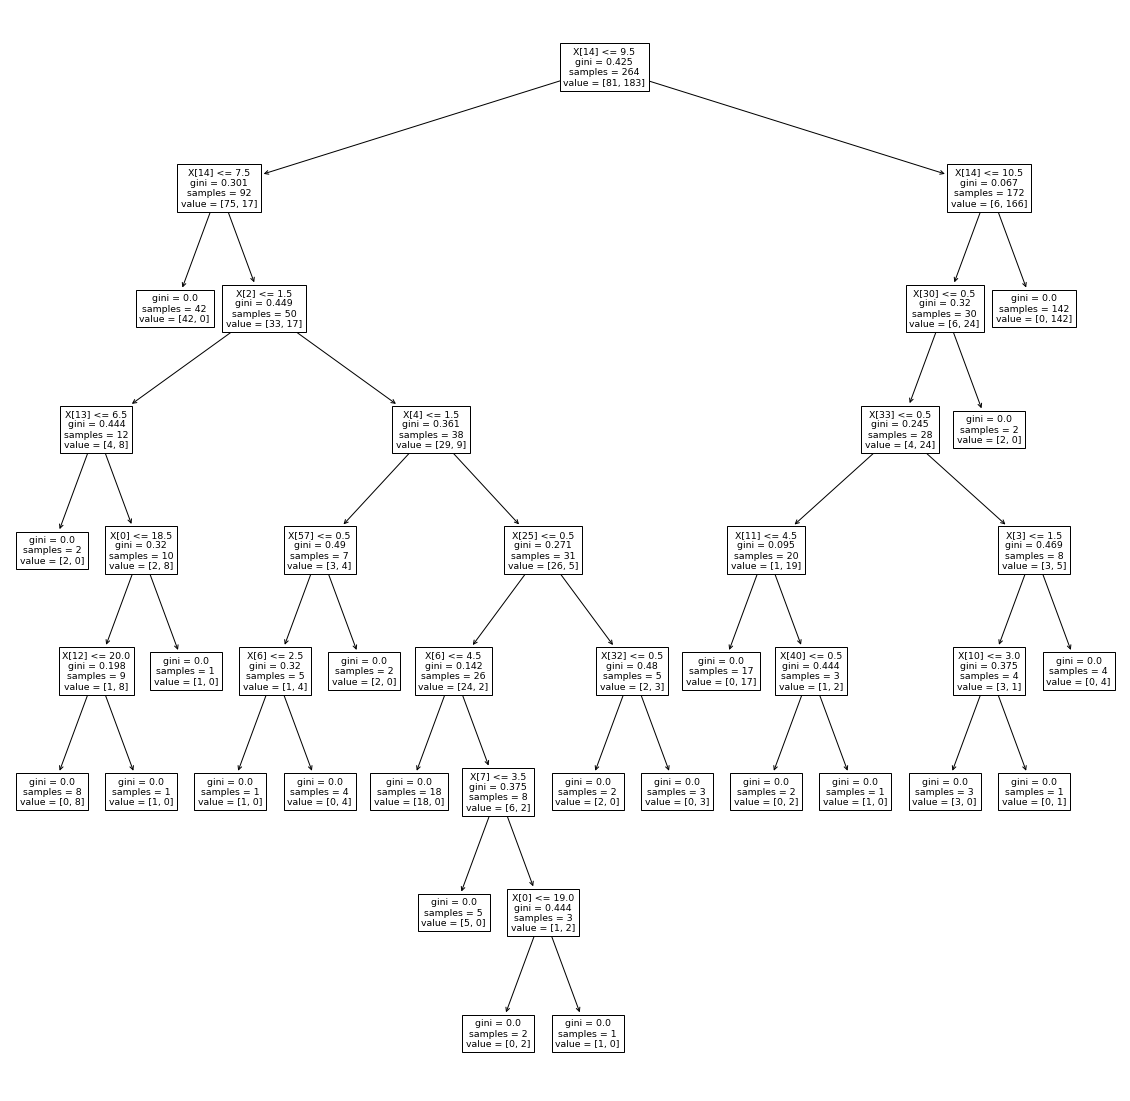

In [77]:
print('測資 : ',X_train[2][0])
print("X[14] : ",X_train[2][0][14])
plt.figure(figsize=(20,20))
tree.plot_tree(id3_bin)
plt.show()

# Random Forest
### 三種不同數量的 forest
+ 我在 binary without pca 的資料裡做了三種 random forest，分別為 100, 200, 300 棵樹
+ 從結果看來，樹的數量越多，模型的準確率也會提升
### K-fold 和 Random Forest 的差別 : 
+ K-fold 是為了避免模型過度擬合訓練資料，而將輸入資料切成 k 等分，將每一份輪流做 test set。k-fold 適用於所有機器學習模型
+ Random Forest 是為了改善 decision tree 對未知資料精確度低的缺點，而在建樹時選擇隨機的 data 和 feature，達到避免過度擬合的效果

In [79]:
clf_bin = RandomForestClassifier()
clf_bin_200 = RandomForestClassifier(n_estimators=200)
clf_bin_300 = RandomForestClassifier(n_estimators=300)
clf_bin_pca = RandomForestClassifier()
clf_lv = RandomForestClassifier()
clf_lv_pca = RandomForestClassifier()

matrix_bin = [[0,0],[0,0]]
matrix_bin_200 = [[0,0],[0,0]]
matrix_bin_300 = [[0,0],[0,0]]
matrix_bin_pca = [[0,0],[0,0]]
matrix_lv = [[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
matrix_lv_pca = [[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
acc_bin = 0
acc_bin_200 = 0
acc_bin_300 = 0
acc_bin_pca = 0
acc_lv = 0
acc_lv_pca = 0
rec_bin = 0
rec_bin_200 = 0
rec_bin_300 = 0
rec_bin_pca = 0
rec_lv = [0,0,0,0,0]
rec_lv_pca = [0,0,0,0,0]
pre_bin = 0
pre_bin_200 = 0
pre_bin_300 = 0
pre_bin_pca = 0
pre_lv = [0,0,0,0,0]
pre_lv_pca = [0,0,0,0,0]
for i in range(3):
    clf_bin = clf_bin.fit(X_train[i],Y_bin_train[i])
    clf_bin_200 = clf_bin_200.fit(X_train[i],Y_bin_train[i])
    clf_bin_300 = clf_bin_300.fit(X_train[i],Y_bin_train[i])
    clf_bin_pca = clf_bin_pca.fit(pca_X_train[i],Y_bin_train[i])
    clf_lv = clf_lv.fit(X_train[i],Y_lv_train[i])
    clf_lv_pca = clf_lv_pca.fit(pca_X_train[i],Y_lv_train[i])
    result_bin = clf_bin.predict(X_test[i])
    result_bin_200 = clf_bin_200.predict(X_test[i])
    result_bin_300 = clf_bin_300.predict(X_test[i])
    result_bin_pca = clf_bin_pca.predict(pca_X_test[i])
    result_lv = clf_lv.predict(X_test[i])
    result_lv_pca = clf_lv_pca.predict(pca_X_test[i])
    matrix_bin += confusion_matrix(Y_bin_test[i],result_bin)
    matrix_bin_200 += confusion_matrix(Y_bin_test[i],result_bin_200)
    matrix_bin_300 += confusion_matrix(Y_bin_test[i],result_bin_300)
    matrix_bin_pca += confusion_matrix(Y_bin_test[i],result_bin_pca)
    matrix_lv += confusion_matrix(Y_lv_test[i],result_lv)
    matrix_lv_pca += confusion_matrix(Y_lv_test[i],result_lv_pca)
    acc_bin += accuracy_score(Y_bin_test[i],result_bin)
    acc_bin_200 += accuracy_score(Y_bin_test[i],result_bin_200)
    acc_bin_300 += accuracy_score(Y_bin_test[i],result_bin_300)
    acc_bin_pca += accuracy_score(Y_bin_test[i],result_bin_pca)
    acc_lv += accuracy_score(Y_lv_test[i],result_lv)
    acc_lv_pca += accuracy_score(Y_lv_test[i],result_lv_pca)
    rec_bin += recall_score(Y_bin_test[i],result_bin)
    rec_bin_200 += recall_score(Y_bin_test[i],result_bin_200)
    rec_bin_300 += recall_score(Y_bin_test[i],result_bin_300)
    rec_bin_pca += recall_score(Y_bin_test[i],result_bin_pca)
    pre_bin += precision_score(Y_bin_test[i],result_bin)
    pre_bin_200 += precision_score(Y_bin_test[i],result_bin_200)
    pre_bin_300 += precision_score(Y_bin_test[i],result_bin_300)
    pre_bin_pca += precision_score(Y_bin_test[i],result_bin_pca)
    rec_lv += recall_score(Y_lv_test[i],result_lv,average=None)
    rec_lv_pca += recall_score(Y_lv_test[i],result_lv_pca,average=None)
    pre_lv += precision_score(Y_lv_test[i],result_lv,average=None)
    pre_lv_pca += precision_score(Y_lv_test[i],result_lv_pca,average=None)
matrix_bin = matrix_bin / 3
matrix_bin_200 = matrix_bin_200 / 3
matrix_bin_300 = matrix_bin_300 / 3
matrix_bin_pca = matrix_bin_pca / 3
matrix_lv = matrix_lv / 3
matrix_lv_pca = matrix_lv_pca / 3
acc_bin = acc_bin / 3
acc_bin_200 = acc_bin_200 / 3
acc_bin_300 = acc_bin_300 / 3
acc_bin_pca = acc_bin_pca / 3
acc_lv = acc_lv / 3
acc_lv_pca = acc_lv_pca / 3
rec_bin = rec_bin / 3
rec_bin_200 = rec_bin_200 / 3
rec_bin_300 = rec_bin_300 / 3
rec_bin_pca = rec_bin_pca / 3
rec_lv = np.array(rec_lv) / 3
rec_lv_pca = np.array(rec_lv_pca) / 3
pre_bin = pre_bin / 3
pre_bin_200 = pre_bin_200 / 3
pre_bin_300 = pre_bin_300 / 3
pre_bin_pca = pre_bin_pca / 3
pre_lv = np.array(pre_lv) / 3
pre_lv_pca = np.array(pre_lv_pca) / 3

print("Confusion matrix of binary (100 trees)")
out = pd.DataFrame(matrix_bin,columns=['failed','passed'],index=['failed','passed'])
display(out)
print("Confusion matrix of binary (200 trees)")
out = pd.DataFrame(matrix_bin_200,columns=['failed','passed'],index=['failed','passed'])
display(out)
print("Confusion matrix of binary (300 trees)")
out = pd.DataFrame(matrix_bin_300,columns=['failed','passed'],index=['failed','passed'])
display(out)
print("Confusion matrix of binary with pca")
out = pd.DataFrame(matrix_bin_pca,columns=['failed','passed'],index=['failed','passed'])
display(out)
print("Confusion matrix of 5 level")
out = pd.DataFrame(matrix_lv,columns=['I','II','III','IV','V'],index=['I','II','III','IV','V'])
display(out)
print("Confusion matrix of 5 level with pca")
out = pd.DataFrame(matrix_lv_pca,columns=['I','II','III','IV','V'],index=['I','II','III','IV','V'])
display(out)
out =  [[acc_bin,acc_bin_200,acc_bin_300,acc_bin_pca],
        [rec_bin,rec_bin_200,rec_bin_300,rec_bin_pca],
        [pre_bin,pre_bin_200,pre_bin_300,pre_bin_pca]]
out = pd.DataFrame(out,columns=['binary (100 trees)','binary (200 trees)','binary (300 trees)','binary (pca)'],
        index=['accuracy','recall','precision'])
display(out)
out =  [[acc_lv,acc_lv_pca]]
idx = ['accuracy']
for i in range(5):
    out.append([round(rec_lv[i],3),round(rec_lv_pca[i],2)])
    idx.append('recall score, pos label = '+str(i+1))
for i in range(5):
    out.append([round(pre_lv[i],3),round(pre_lv_pca[i],2)])
    idx.append('precision, pos label = '+str(i+1))
out = pd.DataFrame(out,columns=['5 level','5 level (pca)'],index=idx)
display(out)

Confusion matrix of binary (100 trees)


,failed,passed
failed,36.666667,6.666667
passed,7.000000,81.333333


Confusion matrix of binary (200 trees)


,failed,passed
failed,37.000000,6.333333
passed,7.333333,81.000000


Confusion matrix of binary (300 trees)


,failed,passed
failed,37.333333,6.000000
passed,7.000000,81.333333


Confusion matrix of binary with pca


,failed,passed
failed,36.000000,7.333333
passed,8.333333,80.000000


Confusion matrix of 5 level


,I,II,III,IV,V
I,39.666667,3.666667,0.000000,0.000000,0.000000
II,10.333333,19.666667,3.333333,1.000000,0.000000
III,0.333333,8.666667,7.333333,4.333333,0.000000
IV,0.000000,1.333333,3.333333,13.000000,2.333333
V,0.000000,0.000000,1.000000,3.666667,8.666667


Confusion matrix of 5 level with pca


,I,II,III,IV,V
I,36.0,7.333333,0.000000,0.000000,0.000000
II,8.0,22.000000,4.000000,0.333333,0.000000
III,0.0,7.000000,9.666667,4.000000,0.000000
IV,0.0,0.666667,4.333333,13.000000,2.000000
V,0.0,0.000000,0.000000,4.000000,9.333333


,binary (100 trees),binary (200 trees),binary (300 trees),binary (pca)
accuracy,0.896137,0.896175,0.901226,0.880928
recall,0.919912,0.916124,0.919912,0.903373
precision,0.923196,0.927197,0.930860,0.914591


,5 level,5 level (pca)
accuracy,0.670908,0.683437
"recall score, pos label = 1",0.920000,0.830000
"recall score, pos label = 2",0.576000,0.630000
"recall score, pos label = 3",0.365000,0.460000
"recall score, pos label = 4",0.662000,0.630000
"recall score, pos label = 5",0.637000,0.730000
"precision, pos label = 1",0.787000,0.820000
"precision, pos label = 2",0.612000,0.590000
"precision, pos label = 3",0.554000,0.520000
"precision, pos label = 4",0.589000,0.610000


# Question for Random Forest
+ Bagging : 在 random forset 裡，為了提高精準度，每次種樹都是隨機選訓練資料，並且讓多棵樹平均決定結果，這樣的做法就是 bagging
+ boosting : 將很多個弱的分類器進行合成變成一個強分類器，每個分類器的權重是不平等的

# KNN
### 三種 k 的差別
+ 我比較了 k = 3, 10 和 100 的情況
+ k = 3 時準確率其實也還不差了
+ k = 10 準確率，精確率，回召率都有一些提升
+ k = 100 回召率特別高，但是準確和精確率都降低很多

In [193]:
knn_bin = KNeighborsClassifier(n_neighbors=3)
knn_bin_200 = KNeighborsClassifier(n_neighbors=10)
knn_bin_300 = KNeighborsClassifier(n_neighbors=100)
knn_bin_pca = KNeighborsClassifier(n_neighbors=3)
knn_lv = KNeighborsClassifier(n_neighbors=3)
knn_lv_pca = KNeighborsClassifier(n_neighbors=3)

matrix_bin = [[0,0],[0,0]]
matrix_bin_200 = [[0,0],[0,0]]
matrix_bin_300 = [[0,0],[0,0]]
matrix_bin_pca = [[0,0],[0,0]]
matrix_lv = [[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
matrix_lv_pca = [[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
acc_bin = 0
acc_bin_200 = 0
acc_bin_300 = 0
acc_bin_pca = 0
acc_lv = 0
acc_lv_pca = 0
rec_bin = 0
rec_bin_200 = 0
rec_bin_300 = 0
rec_bin_pca = 0
rec_lv = [0,0,0,0,0]
rec_lv_pca = [0,0,0,0,0]
pre_bin = 0
pre_bin_200 = 0
pre_bin_300 = 0
pre_bin_pca = 0
pre_lv = [0,0,0,0,0]
pre_lv_pca = [0,0,0,0,0]
for i in range(3):
    knn_bin = knn_bin.fit(X_train[i],Y_bin_train[i])
    knn_bin_200 = knn_bin_200.fit(X_train[i],Y_bin_train[i])
    knn_bin_300 = knn_bin_300.fit(X_train[i],Y_bin_train[i])
    knn_bin_pca = knn_bin_pca.fit(pca_X_train[i],Y_bin_train[i])
    knn_lv = knn_lv.fit(X_train[i],Y_lv_train[i])
    knn_lv_pca = knn_lv_pca.fit(pca_X_train[i],Y_lv_train[i])
    result_bin = knn_bin.predict(X_test[i])
    result_bin_200 = knn_bin_200.predict(X_test[i])
    result_bin_300 = knn_bin_300.predict(X_test[i])
    result_bin_pca = knn_bin_pca.predict(pca_X_test[i])
    result_lv = knn_lv.predict(X_test[i])
    result_lv_pca = knn_lv_pca.predict(pca_X_test[i])
    matrix_bin += confusion_matrix(Y_bin_test[i],result_bin)
    matrix_bin_200 += confusion_matrix(Y_bin_test[i],result_bin_200)
    matrix_bin_300 += confusion_matrix(Y_bin_test[i],result_bin_300)
    matrix_bin_pca += confusion_matrix(Y_bin_test[i],result_bin_pca)
    matrix_lv += confusion_matrix(Y_lv_test[i],result_lv)
    matrix_lv_pca += confusion_matrix(Y_lv_test[i],result_lv_pca)
    acc_bin += accuracy_score(Y_bin_test[i],result_bin)
    acc_bin_200 += accuracy_score(Y_bin_test[i],result_bin_200)
    acc_bin_300 += accuracy_score(Y_bin_test[i],result_bin_300)
    acc_bin_pca += accuracy_score(Y_bin_test[i],result_bin_pca)
    acc_lv += accuracy_score(Y_lv_test[i],result_lv)
    acc_lv_pca += accuracy_score(Y_lv_test[i],result_lv_pca)
    rec_bin += recall_score(Y_bin_test[i],result_bin)
    rec_bin_200 += recall_score(Y_bin_test[i],result_bin_200)
    rec_bin_300 += recall_score(Y_bin_test[i],result_bin_300)
    rec_bin_pca += recall_score(Y_bin_test[i],result_bin_pca)
    pre_bin += precision_score(Y_bin_test[i],result_bin)
    pre_bin_200 += precision_score(Y_bin_test[i],result_bin_200)
    pre_bin_300 += precision_score(Y_bin_test[i],result_bin_300)
    pre_bin_pca += precision_score(Y_bin_test[i],result_bin_pca)
    rec_lv += recall_score(Y_lv_test[i],result_lv,average=None)
    rec_lv_pca += recall_score(Y_lv_test[i],result_lv_pca,average=None)
    pre_lv += precision_score(Y_lv_test[i],result_lv,average=None)
    pre_lv_pca += precision_score(Y_lv_test[i],result_lv_pca,average=None)
matrix_bin = matrix_bin / 3
matrix_bin_200 = matrix_bin_200 / 3
matrix_bin_300 = matrix_bin_300 / 3
matrix_bin_pca = matrix_bin_pca / 3
matrix_lv = matrix_lv / 3
matrix_lv_pca = matrix_lv_pca / 3
acc_bin = acc_bin / 3
acc_bin_200 = acc_bin_200 / 3
acc_bin_300 = acc_bin_300 / 3
acc_bin_pca = acc_bin_pca / 3
acc_lv = acc_lv / 3
acc_lv_pca = acc_lv_pca / 3
rec_bin = rec_bin / 3
rec_bin_200 = rec_bin_200 / 3
rec_bin_300 = rec_bin_300 / 3
rec_bin_pca = rec_bin_pca / 3
rec_lv = np.array(rec_lv) / 3
rec_lv_pca = np.array(rec_lv_pca) / 3
pre_bin = pre_bin / 3
pre_bin_200 = pre_bin_200 / 3
pre_bin_300 = pre_bin_300 / 3
pre_bin_pca = pre_bin_pca / 3
pre_lv = np.array(pre_lv) / 3
pre_lv_pca = np.array(pre_lv_pca) / 3

print("Confusion matrix of binary (100 trees)")
out = pd.DataFrame(matrix_bin,columns=['failed','passed'],index=['failed','passed'])
display(out)
print("Confusion matrix of binary (200 trees)")
out = pd.DataFrame(matrix_bin_200,columns=['failed','passed'],index=['failed','passed'])
display(out)
print("Confusion matrix of binary (300 trees)")
out = pd.DataFrame(matrix_bin_300,columns=['failed','passed'],index=['failed','passed'])
display(out)
print("Confusion matrix of binary with pca")
out = pd.DataFrame(matrix_bin_pca,columns=['failed','passed'],index=['failed','passed'])
display(out)
print("Confusion matrix of 5 level")
out = pd.DataFrame(matrix_lv,columns=['I','II','III','IV','V'],index=['I','II','III','IV','V'])
display(out)
print("Confusion matrix of 5 level with pca")
out = pd.DataFrame(matrix_lv_pca,columns=['I','II','III','IV','V'],index=['I','II','III','IV','V'])
display(out)
out =  [[acc_bin,acc_bin_200,acc_bin_300,acc_bin_pca],
        [rec_bin,rec_bin_200,rec_bin_300,rec_bin_pca],
        [pre_bin,pre_bin_200,pre_bin_300,pre_bin_pca]]
out = pd.DataFrame(out,columns=['binary (k = 3))','binary (k = 10)','binary (k = 100)','binary (pca)'],
        index=['accuracy','recall','precision'])
display(out)
out =  [[acc_lv,acc_lv_pca]]
idx = ['accuracy']
for i in range(5):
    out.append([round(rec_lv[i],3),round(rec_lv_pca[i],2)])
    idx.append('recall score, pos label = '+str(i+1))
for i in range(5):
    out.append([round(pre_lv[i],3),round(pre_lv_pca[i],2)])
    idx.append('precision, pos label = '+str(i+1))
out = pd.DataFrame(out,columns=['5 level','5 level (pca)'],index=idx)
display(out)

Confusion matrix of binary (100 trees)


,failed,passed
failed,35.333333,8.0
passed,6.333333,82.0


Confusion matrix of binary (200 trees)


,failed,passed
failed,36.666667,6.666667
passed,7.000000,81.333333


Confusion matrix of binary (300 trees)


,failed,passed
failed,18.0,25.333333
passed,0.0,88.333333


Confusion matrix of binary with pca


,failed,passed
failed,36.0,7.333333
passed,8.0,80.333333


Confusion matrix of 5 level


,I,II,III,IV,V
I,36.000000,7.000000,0.333333,0.000000,0.000000
II,10.000000,20.000000,4.000000,0.333333,0.000000
III,0.666667,11.333333,6.000000,2.666667,0.000000
IV,0.000000,2.333333,3.666667,12.333333,1.666667
V,0.000000,0.666667,0.666667,4.666667,7.333333


Confusion matrix of 5 level with pca


,I,II,III,IV,V
I,36.000000,7.000000,0.333333,0.000000,0.000000
II,8.333333,21.333333,4.666667,0.000000,0.000000
III,0.333333,6.666667,11.000000,2.666667,0.000000
IV,0.000000,1.000000,5.666667,11.333333,2.000000
V,0.000000,0.000000,0.666667,4.333333,8.333333


,binary (k = 3)),binary (k = 10),binary (k = 100),binary (pca)
accuracy,0.891086,0.896214,0.807522,0.883549
recall,0.927451,0.920479,1.000000,0.909368
precision,0.911313,0.924683,0.777265,0.917000


,5 level,5 level (pca)
accuracy,0.620287,0.66844
"recall score, pos label = 1",0.830000,0.83000
"recall score, pos label = 2",0.588000,0.62000
"recall score, pos label = 3",0.297000,0.53000
"recall score, pos label = 4",0.600000,0.57000
"recall score, pos label = 5",0.535000,0.62000
"precision, pos label = 1",0.781000,0.81000
"precision, pos label = 2",0.484000,0.59000
"precision, pos label = 3",0.397000,0.50000
"precision, pos label = 4",0.612000,0.62000


# Question for KNN
從下面的結果可以看到，距離測資最近的三個點分別為第 120, 134, 257 筆資料，並且距離分別為 6, 6, 6.08276253

In [88]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3)
neigh.fit(X_train[0])
print('我選的測資')
print(X_test[0][0])
print(neigh.kneighbors([X_test[0][0]]))

我選的測資
[18.  4.  4.  2.  2.  0.  4.  3.  4.  1.  1.  3.  6.  5.  6.  1.  0.  1.
  0.  0.  1.  1.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.
  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.
  1.  0.  1.  0.]
(array([[6.        , 6.        , 6.08276253]]), array([[120, 134, 257]], dtype=int32))


# Bonus
如下，這是我將資料以 pca 降成二維再重新訓練模型並且畫出來的圖

0.6666666666666666


C:\Users\user\AppData\Local\Temp/ipykernel_3788/659648241.py:34: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


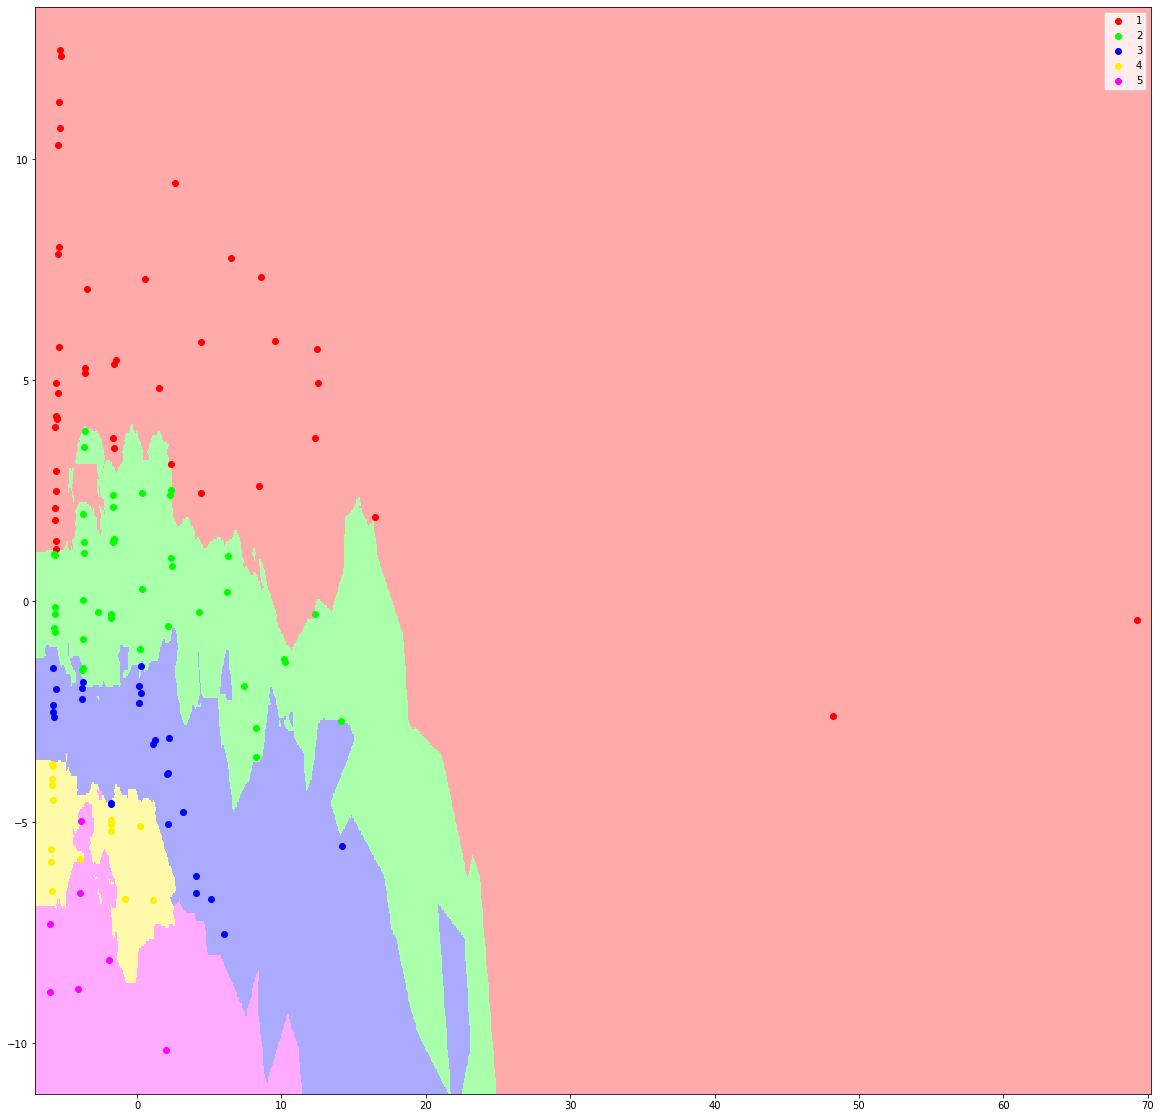

In [221]:
bonus = pca.fit_transform(data.drop('G3',axis=1))
knn_bonus = KNeighborsClassifier(n_neighbors=10)
kf = KFold(n_splits=3,shuffle=True)
bonus = np.array(bonus)
bonus_train = []
bonus_test = []
bonus_y_train = []
bonus_y = []
for train, test in kf.split(X):
    bonus_train.append(bonus[train])
    bonus_test.append(bonus[test])
    bonus_y_train.append(Y_lv[train])
    bonus_y.append(Y_lv[test])
knn_bonus.fit(bonus_train[0],bonus_y_train[0])
result = knn_bonus.predict(bonus_test[0])
#print(accuracy_score(result,bonus_y[0]))

x_min, x_max = bonus_test[0][:, 0].min() - 1, bonus_test[0][:, 0].max() + 1
y_min, y_max = bonus_test[0][:, 1].min() - 1, bonus_test[0][:, 1].max() + 1
#print(x_min,x_max,y_min,y_max)
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))
Z = knn_bonus.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

dot_x = [[],[],[],[],[]]
dot_y = [[],[],[],[],[]]
for i in range(result.shape[0]):
    dot_x[result[i]-1].append(bonus_test[0][i][0])
    dot_y[result[i]-1].append(bonus_test[0][i][1])
Color = ('#FF0000', '#00FF00', '#0000FF', '#FFF000', '#FF00FF')
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFAAA', '#FFAAFF'])
#print(bonus_test[0][:,0],bonus_test[0][:,1],result)
plt.figure(figsize=(20,20))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(dot_x[0],dot_y[0],color=Color[0],label='1')
plt.scatter(dot_x[1],dot_y[1],color=Color[1],label='2')
plt.scatter(dot_x[2],dot_y[2],color=Color[2],label='3')
plt.scatter(dot_x[3],dot_y[3],color=Color[3],label='4')
plt.scatter(dot_x[4],dot_y[4],color=Color[4],label='5')
plt.legend()
plt.show()

# Question for PCA

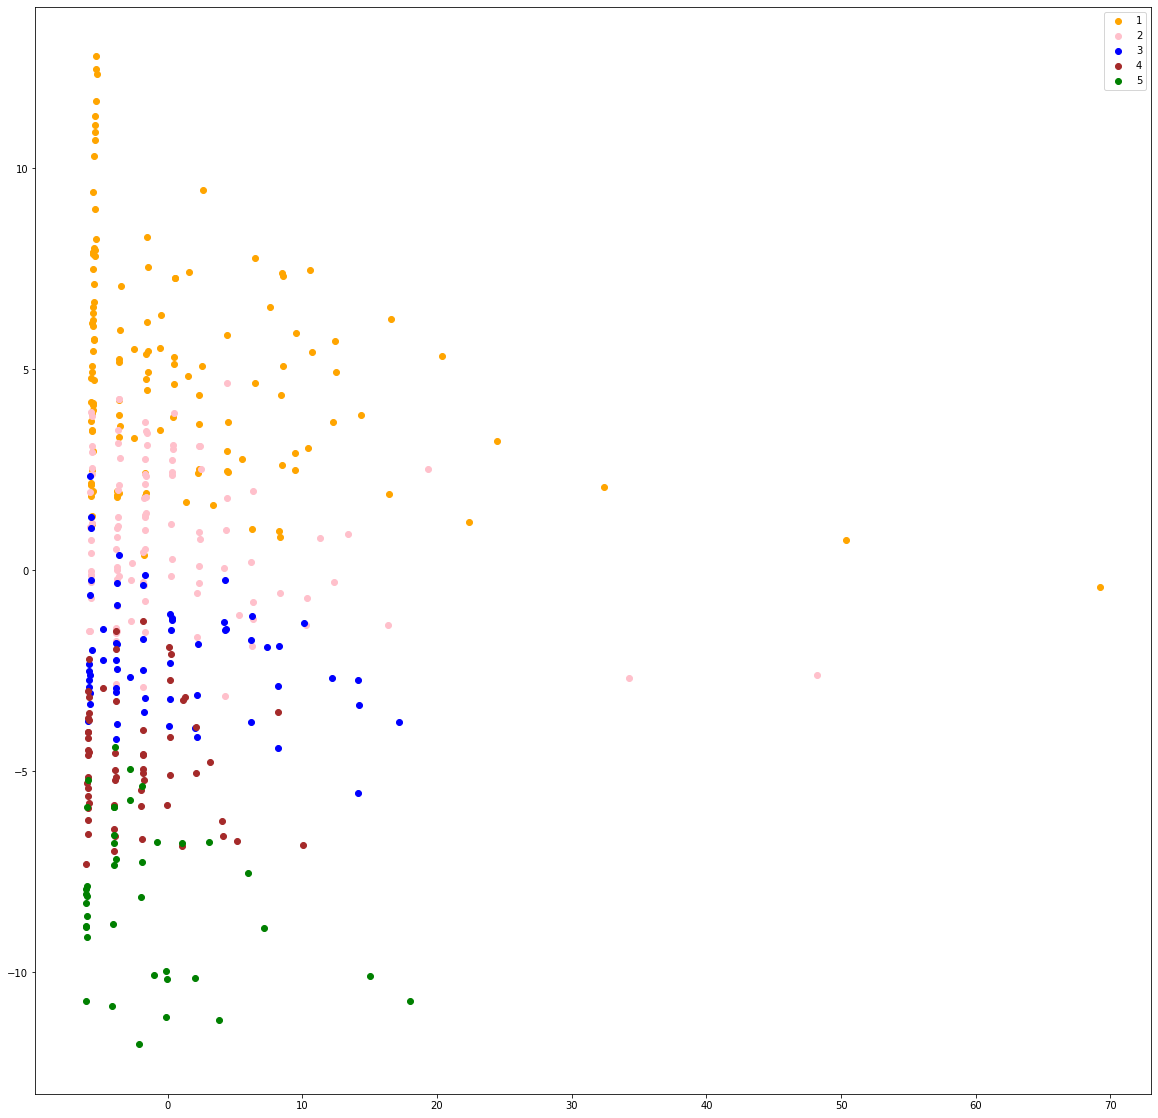

In [78]:
X_pca = pca.fit_transform(X)
#print(X_pca)
dot_x = [[],[],[],[],[]]
dot_y = [[],[],[],[],[]]
for i in range(X_pca.shape[0]):
    dot_x[Y_lv[i]-1].append(X_pca[i][0])
    dot_y[Y_lv[i]-1].append(X_pca[i][1])
Color = ["orange","pink","blue","brown","green"]

plt.figure(figsize=(20,20))
plt.scatter(dot_x[0],dot_y[0],color=Color[0],label='1')
plt.scatter(dot_x[1],dot_y[1],color=Color[1],label='2')
plt.scatter(dot_x[2],dot_y[2],color=Color[2],label='3')
plt.scatter(dot_x[3],dot_y[3],color=Color[3],label='4')
plt.scatter(dot_x[4],dot_y[4],color=Color[4],label='5')
plt.legend()
plt.show()

# Compare & Conclusion
由於使用 sklearn 的模型，這次三題的程式碼長的都很類似，但是為了回答問題我還是必須了解每個方法的原理，讓我對機器學習有更多的了解  
我發現使用 pca 降維後，準確率往往會降低，我猜應該是 pca 降維會改變資料導致的